In [65]:
import matplotlib
import pandas as pd
import numpy as np
import csv
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit

In [91]:
df = pd.read_csv('data/Dataset.csv', sep="\t")
df.head()

,Canonical lead protein ID,Prediction,Prediction confidence class,Subcellular distribution,Sequence
0,Q80UP8,Plasma membrane,High,Mostly Organellar,MAMDGYLWMVILGFIIAFILAFSVGANDVANSFGTAVGSGVVTLRQ...
1,P29533,Plasma membrane,High,Mostly Organellar,MPVKMVAVLGASTVLWILFAVSQAFKIEISPEYKTIAQIGDSMALT...
2,Q921I6,Plasma membrane,High,Mostly Organellar,MAAQRIRAANASGLPRCKSEGTLIDLSEGFSETSFNDVKVPSPSAL...
3,Q7TMS5,Plasma membrane,High,Mostly Organellar,MSSSNDHVLVPMSQRNNNGLPRTNSRAVRTLAEGDVLSFHHITYRV...
4,Q6P6I8,Plasma membrane,High,Mostly Organellar,MSSSNDHVLVPMSQRNNNGLPRTNSRAVRTLAEGDVLSFHHITYRV...


In [92]:
print(df.columns)

Index(['Canonical lead protein ID', 'Prediction',
       'Prediction confidence class', 'Subcellular distribution', 'Sequence'],
      dtype='object')


In [93]:
df.shape

(8061, 5)

In [94]:
lengh_seq = []
for seq in df["Sequence"]:
    lengh_seq.append(len(seq))
lengh_seq = np.asarray(lengh_seq)

In [95]:
df["Sequence Lengh"] = lengh_seq

In [96]:
df.head()

,Canonical lead protein ID,Prediction,Prediction confidence class,Subcellular distribution,Sequence,Sequence Lengh
0,Q80UP8,Plasma membrane,High,Mostly Organellar,MAMDGYLWMVILGFIIAFILAFSVGANDVANSFGTAVGSGVVTLRQ...,656
1,P29533,Plasma membrane,High,Mostly Organellar,MPVKMVAVLGASTVLWILFAVSQAFKIEISPEYKTIAQIGDSMALT...,739
2,Q921I6,Plasma membrane,High,Mostly Organellar,MAAQRIRAANASGLPRCKSEGTLIDLSEGFSETSFNDVKVPSPSAL...,962
3,Q7TMS5,Plasma membrane,High,Mostly Organellar,MSSSNDHVLVPMSQRNNNGLPRTNSRAVRTLAEGDVLSFHHITYRV...,657
4,Q6P6I8,Plasma membrane,High,Mostly Organellar,MSSSNDHVLVPMSQRNNNGLPRTNSRAVRTLAEGDVLSFHHITYRV...,657


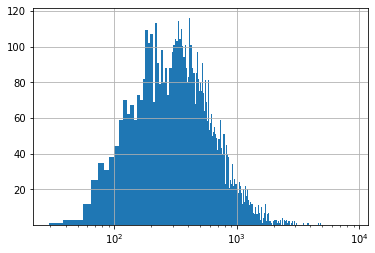

In [97]:
fig, ax = plt.subplots()
df['Sequence Lengh'].hist(ax=ax, bins=1000, bottom=0.1)
ax.set_xscale('log')

In [98]:
indexNames = df[ df['Sequence Lengh'] > 1500 ].index
 
# Delete these row indexes from dataFrame
df_short = df.drop(indexNames , inplace=False).reset_index(drop=True)
df_short.head()

,Canonical lead protein ID,Prediction,Prediction confidence class,Subcellular distribution,Sequence,Sequence Lengh
0,Q80UP8,Plasma membrane,High,Mostly Organellar,MAMDGYLWMVILGFIIAFILAFSVGANDVANSFGTAVGSGVVTLRQ...,656
1,P29533,Plasma membrane,High,Mostly Organellar,MPVKMVAVLGASTVLWILFAVSQAFKIEISPEYKTIAQIGDSMALT...,739
2,Q921I6,Plasma membrane,High,Mostly Organellar,MAAQRIRAANASGLPRCKSEGTLIDLSEGFSETSFNDVKVPSPSAL...,962
3,Q7TMS5,Plasma membrane,High,Mostly Organellar,MSSSNDHVLVPMSQRNNNGLPRTNSRAVRTLAEGDVLSFHHITYRV...,657
4,Q6P6I8,Plasma membrane,High,Mostly Organellar,MSSSNDHVLVPMSQRNNNGLPRTNSRAVRTLAEGDVLSFHHITYRV...,657


In [99]:
print(df_short.shape)
print(df.shape)

(7523, 6)
(8061, 6)


In [100]:
indexNames = df_short[ df_short['Sequence'].str.contains('X') == True ].index
 
# Delete these row indexes from dataFrame
df_short = df_short.drop(indexNames , inplace=False).reset_index(drop=True)
df_short.head()

,Canonical lead protein ID,Prediction,Prediction confidence class,Subcellular distribution,Sequence,Sequence Lengh
0,Q80UP8,Plasma membrane,High,Mostly Organellar,MAMDGYLWMVILGFIIAFILAFSVGANDVANSFGTAVGSGVVTLRQ...,656
1,P29533,Plasma membrane,High,Mostly Organellar,MPVKMVAVLGASTVLWILFAVSQAFKIEISPEYKTIAQIGDSMALT...,739
2,Q921I6,Plasma membrane,High,Mostly Organellar,MAAQRIRAANASGLPRCKSEGTLIDLSEGFSETSFNDVKVPSPSAL...,962
3,Q7TMS5,Plasma membrane,High,Mostly Organellar,MSSSNDHVLVPMSQRNNNGLPRTNSRAVRTLAEGDVLSFHHITYRV...,657
4,Q6P6I8,Plasma membrane,High,Mostly Organellar,MSSSNDHVLVPMSQRNNNGLPRTNSRAVRTLAEGDVLSFHHITYRV...,657


In [101]:
df_short.shape

(7499, 6)

In [102]:
# No value
missing_val_count_by_column = (df_short.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Prediction                     3925
Prediction confidence class    3925
Subcellular distribution       1833
dtype: int64


In [103]:
df_short["Prediction"] = df_short["Prediction"].fillna("No Compartment")
df_short["Subcellular distribution"] = df_short["Subcellular distribution"].fillna("No Class")

In [104]:
df_short.groupby(["Prediction"]).count()
# I will remove all the No Prediction rows

,Canonical lead protein ID,Prediction confidence class,Subcellular distribution,Sequence,Sequence Lengh
Prediction,,,,,
Actin binding proteins,147,147,147,147,147
ER,314,314,314,314,314
ER_high_curvature,4,4,4,4,4
Endosome,302,302,302,302,302
Ergic/cisGolgi,38,38,38,38,38
Golgi,102,102,102,102,102
Large Protein Complex,1542,1542,1542,1542,1542
Lysosome,57,57,57,57,57
Mitochondrion,500,500,500,500,500


In [105]:
df_short.head()

,Canonical lead protein ID,Prediction,Prediction confidence class,Subcellular distribution,Sequence,Sequence Lengh
0,Q80UP8,Plasma membrane,High,Mostly Organellar,MAMDGYLWMVILGFIIAFILAFSVGANDVANSFGTAVGSGVVTLRQ...,656
1,P29533,Plasma membrane,High,Mostly Organellar,MPVKMVAVLGASTVLWILFAVSQAFKIEISPEYKTIAQIGDSMALT...,739
2,Q921I6,Plasma membrane,High,Mostly Organellar,MAAQRIRAANASGLPRCKSEGTLIDLSEGFSETSFNDVKVPSPSAL...,962
3,Q7TMS5,Plasma membrane,High,Mostly Organellar,MSSSNDHVLVPMSQRNNNGLPRTNSRAVRTLAEGDVLSFHHITYRV...,657
4,Q6P6I8,Plasma membrane,High,Mostly Organellar,MSSSNDHVLVPMSQRNNNGLPRTNSRAVRTLAEGDVLSFHHITYRV...,657


In [106]:
df_short["Prediction"].value_counts()

No Compartment                  3925
Large Protein Complex           1542
Mitochondrion                    500
ER                               314
Endosome                         302
Plasma membrane                  286
Nuclear pore complex/nuclear     244
Actin binding proteins           147
Golgi                            102
Lysosome                          57
Peroxisome                        38
Ergic/cisGolgi                    38
ER_high_curvature                  4
Name: Prediction, dtype: int64

In [107]:
df_short["Prediction"].value_counts() / len(df_short) *100

No Compartment                  52.340312
Large Protein Complex           20.562742
Mitochondrion                    6.667556
ER                               4.187225
Endosome                         4.027204
Plasma membrane                  3.813842
Nuclear pore complex/nuclear     3.253767
Actin binding proteins           1.960261
Golgi                            1.360181
Lysosome                         0.760101
Peroxisome                       0.506734
Ergic/cisGolgi                   0.506734
ER_high_curvature                0.053340
Name: Prediction, dtype: float64

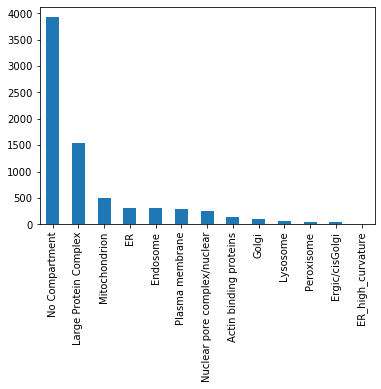

In [108]:
df_short['Prediction'].value_counts().plot.bar()

In [109]:
df_short["Subcellular distribution"].value_counts()

Mostly Organellar                 1890
No Class                          1833
Mostly Cytosolic                  1413
Mostly Nuclear                     978
Organellar with Cytosolic pool     886
Nuclear and Cytosolic              499
Name: Subcellular distribution, dtype: int64

In [110]:
df_short["Subcellular distribution"].value_counts() / len(df_short) *100

Mostly Organellar                 25.203360
No Class                          24.443259
Mostly Cytosolic                  18.842512
Mostly Nuclear                    13.041739
Organellar with Cytosolic pool    11.814909
Nuclear and Cytosolic              6.654221
Name: Subcellular distribution, dtype: float64

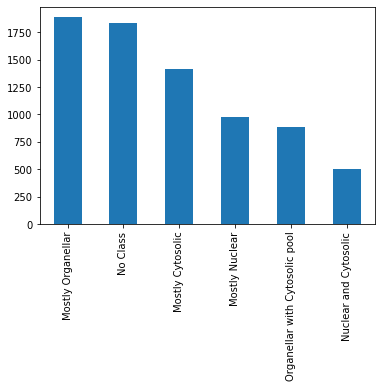

In [111]:
df_short["Subcellular distribution"].value_counts().plot.bar()

In [112]:
df_short.groupby(["Prediction", "Subcellular distribution"]).count()

Canonical lead protein ID  \
Prediction                   Subcellular distribution                                    
Actin binding proteins       Mostly Cytosolic                                       77   
                             Mostly Organellar                                       1   
                             No Class                                               46   
                             Nuclear and Cytosolic                                   2   
                             Organellar with Cytosolic pool                         21   
ER                           Mostly Cytosolic                                        5   
                             Mostly Organellar                                       1   
                             No Class                                              306   
                             Nuclear and Cytosolic                                   2   
ER_high_curvature            No Class                                                4   
Endosome                     Mostly Cytosolic                                       24   
                             Mostly Organellar                                      59   
                             No Class                                              107   
                             Nuclear and Cytosolic                                   1   
                             Organellar with Cytosolic pool                        111   
Ergic/cisGolgi               No Class                                               38   
Golgi                        Mostly Cytosolic                                       10   
                             Mostly Organellar                                      35   
                             No Class                                               44   
                             Nuclear and Cytosolic                                   1   
                             Organellar with Cytosolic pool                         12   
Large Protein Complex        Mostly Cytosolic                                      220   
                             Mostly Nuclear                                         77   
                             Mostly Organellar                                       6   
                             No Class                                              890   
                             Nuclear and Cytosolic                                 187   
                             Organellar with Cytosolic pool                        162   
Lysosome                     Mostly Organellar                                      21   
                             No Class                                               36   
Mitochondrion                Mostly Cytosolic                                        4   
                             Mostly Organellar                                     241   
                             No Class                                              238   
                             Organellar with Cytosolic pool                         17   
No Compartment               Mostly Cytosolic                                     1063   
                             Mostly Nuclear                                        707   
                             Mostly Organellar                                    1378   
                             Nuclear and Cytosolic                                 256   
                             Organellar with Cytosolic pool                        521   
Nuclear pore complex/nuclear Mostly Nuclear                                        194   
                             Nuclear and Cytosolic                                  50   
Peroxisome                   Mostly Organellar                                       5   
                             No Class                                               29   
                             Organellar with Cytosolic pool                          4   
Plasma memb

## Simplify dataset

### Combining ER and High Curvature ER

In [113]:
df_simple = df_short.replace('ER_high_curvature', 'ER')

### Deleting too small categories

In [114]:
df_simple = df_simple[df_simple["Prediction"] != 'Peroxisome'].reset_index(drop=True)
df_simple = df_simple[df_simple["Prediction"] != 'Ergic/cisGolgi'].reset_index(drop=True)
# Remove actin because not a compartment, cannot be compared to other algorithm.
df_simple = df_simple[df_simple["Prediction"] != 'Actin binding proteins'].reset_index(drop=True)

In [115]:
df_simple["Prediction"].value_counts() / len(df_simple) *100

No Compartment                  53.944475
Large Protein Complex           21.192963
Mitochondrion                    6.871908
ER                               4.370533
Endosome                         4.150632
Plasma membrane                  3.930731
Nuclear pore complex/nuclear     3.353491
Golgi                            1.401869
Lysosome                         0.783397
Name: Prediction, dtype: float64

### Make 7C dataset that fit Human cell model

In [116]:
# I will remove it for now, to fit with previous model on Hela cells, but I could keep it for multiclass training
df_7C = df_simple[df_simple["Prediction"] != 'Nuclear pore complex/nuclear'].reset_index(drop=True)
df_7C = df_7C[df_7C["Prediction"] != 'No Compartment'].reset_index(drop=True)

In [117]:
df_7C["Prediction"].value_counts() / len(df_7C) *100

Large Protein Complex    49.629868
Mitochondrion            16.092694
ER                       10.234953
Endosome                  9.719987
Plasma membrane           9.205021
Golgi                     3.282910
Lysosome                  1.834567
Name: Prediction, dtype: float64

## Merge Large Protein Complex with No Compartment

To see whether it perform better 

In [130]:
df_nocomp = df_7C.replace('Large Protein Complex', 'No Compartment')

In [131]:
df_nocomp["Prediction"].value_counts() / len(df_nocomp) *100

No Compartment     49.629868
Mitochondrion      16.092694
ER                 10.234953
Endosome            9.719987
Plasma membrane     9.205021
Golgi               3.282910
Lysosome            1.834567
Name: Prediction, dtype: float64

## Spliting the Dataset

In [132]:
# Stratified Sampling
#better for rare categories

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_nocomp, df_nocomp["Prediction"]):
    trainVal_set = df_nocomp.loc[train_index]
    test_set = df_nocomp.loc[test_index]
    
trainVal = trainVal_set.reset_index(drop=True)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=42)
for train_index, valid_index in split.split(trainVal, trainVal["Prediction"]):
    train_set = trainVal.loc[train_index]
    valid_set = trainVal.loc[valid_index]

In [133]:
test_set["Prediction"].value_counts() / len(test_set) *100

No Compartment     49.678457
Mitochondrion      16.077170
ER                 10.289389
Endosome            9.807074
Plasma membrane     9.163987
Golgi               3.215434
Lysosome            1.768489
Name: Prediction, dtype: float64

In [134]:
train_set["Prediction"].value_counts() / len(train_set) *100

No Compartment     49.597586
Mitochondrion      16.096579
ER                 10.211268
Endosome            9.708249
Plasma membrane     9.205231
Golgi               3.319920
Lysosome            1.861167
Name: Prediction, dtype: float64

In [135]:
valid_set["Prediction"].value_counts() / len(valid_set) *100

No Compartment     49.698189
Mitochondrion      16.096579
ER                 10.261569
Endosome            9.657948
Plasma membrane     9.255533
Golgi               3.219316
Lysosome            1.810865
Name: Prediction, dtype: float64

In [136]:
train_set.to_csv(path_or_buf= "data/6C_train.csv", sep="\t", index=False)
valid_set.to_csv(path_or_buf= "data/6C_valid.csv", sep="\t", index=False)
test_set.to_csv(path_or_buf="data/6C_test.csv", sep="\t", index=False)